
$\frac{\bar{X} - a}{\sigma}\sqrt{N} \sim \mathcal{N}(0,1)$

$\frac{\bar{X} - a}{\tilde{s}}\sqrt{N} \sim t_{n-1}$,где  $t_{n-1}$ распределение Стьюдента с $n-1$ степенью свободы,

$\tilde{s} = \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}}$ - стандартное отклонение

$\frac{(n-1)\tilde{s}^2}{\sigma^2} \sim \chi^2_{n-1}$

$\frac{ns^2}{\sigma^2} \sim \chi^2_{n}$, где $s = \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n}}$ 



In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as sts
%matplotlib inline

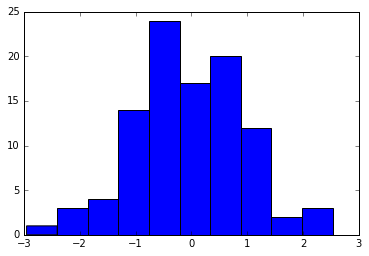

In [4]:
alpha, N = .95, 100

def resample():
    return sts.norm(0.,1.).rvs(size=N)
    
sample = resample()
    
trash = plt.hist(sample, bins=N/10)

In [5]:
def interval_plot(lower_bound, upper_bound, ymin, ymax):
    y1, y2 = np.zeros(N), np.zeros(N)
    for i in range(1, N + 1):
        y1[i-1], y2[i-1] = lower_bound(sample[:i], i), upper_bound(sample[:i], i)
    plt.figure(figsize=(16, 8))
    plt.fill_between(np.arange(1, N + 1), y1, y2)
    plt.ylim(ymin, ymax)
    plt.show()

# a) 

Найдем точный доверительный интервал для $a$ при $\sigma^2 = 1$.

Для $N(\theta,1)$ точным доверительным интервалом уровня $\alpha$ будет:

$(\bar{X} - Z_{\frac{1+\alpha}{2}}\frac{1}{\sqrt{N}}, \bar{X} + Z_{\frac{1+\alpha}{2}}\frac{1}{\sqrt{N}})$

где $Z_{(\frac{1+\alpha}{2})}$ - квантиль нормального распределения $\mathcal{N}(0,1)$ уровня $\frac{1 + \alpha}{2}$

In [21]:
z = sts.norm.ppf((alpha+1.)/2.)
lower_bound = lambda x, n: np.mean(x)-z*n**-.5
upper_bound = lambda x, n: np.mean(x)+z*n**-.5

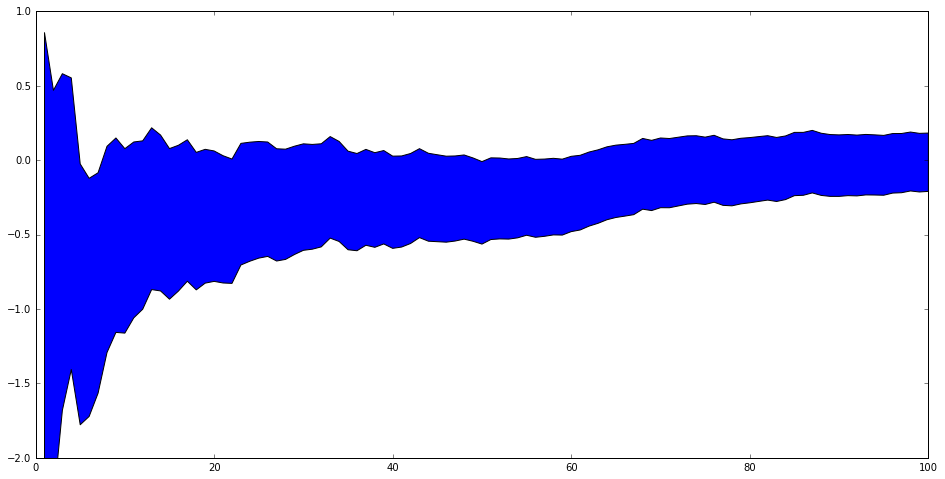

In [22]:
interval_plot(lower_bound, 
              upper_bound,
              -2., 
              1.)

# b)

Для $N(0,\theta)$ точным доверительным интервалом уровня $\alpha$ будет:

($\frac{\sum_{i=1}^{n}{X_i^2}}{z_{\frac{1+\alpha}{2}}},\frac{\sum_{i=1}^{n}{X_i^2}}{z_{\frac{1-\alpha}{2}}})$, г

z - квантиль распределения $\chi^2_n$

In [23]:
z_1 = lambda n: sts.chi2.ppf((1.+alpha)/2., df=n)
z_2 = lambda n: sts.chi2.ppf((1.-alpha)/2., df=n)
lower_bound = lambda x, n: np.sum(x*x)/z_1(n)
upper_bound = lambda x, n: np.sum(x*x)/z_2(n)

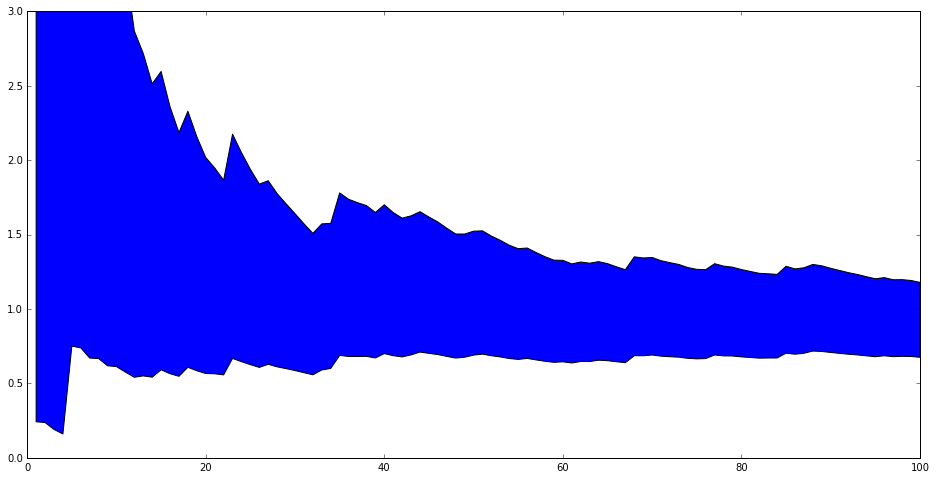

In [28]:
interval_plot(lower_bound,
              upper_bound,
              0.,
              3.)

# c)

Для $N(\theta,\sigma^2)$ точным доверительным интервалом уровня $\alpha$ будет:

$(\bar{X} - t_{\frac{1+\alpha}{2}}\frac{\tilde{s}}{\sqrt{N}}, \bar{X} + t_{\frac{1+\alpha}{2}}\frac{\tilde{s}}{\sqrt{N}})$

где $z_{(\frac{1+\alpha}{2})}$ - квантиль распределения Стьюдента с $n-1$ степенью свободы уровня $\frac{1 + \alpha}{2}$,

$\tilde{s} = \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}}$ - стандартное отклонение

In [6]:
def interval_plot_c(lower_bound, upper_bound, ymin, ymax):
    y1, y2 = np.zeros(N), np.zeros(N)
    for i in range(2, N + 1):
        y1[i-1], y2[i-1] = lower_bound(sample[:i], i), upper_bound(sample[:i], i)
    plt.figure(figsize=(16, 8))
    plt.fill_between(np.arange(1, N + 1), y1, y2)
    plt.ylim(ymin, ymax)
    plt.show()

In [14]:
z = lambda n : sts.t.ppf((1.+alpha)/2., n-1.)
lower_bound = lambda x, n: np.mean(x) - (np.var(x) / (n-1)) ** 0.5 * z(n)
upper_bound = lambda x, n: np.mean(x) + (np.var(x) / (n-1)) ** 0.5 * z(n)

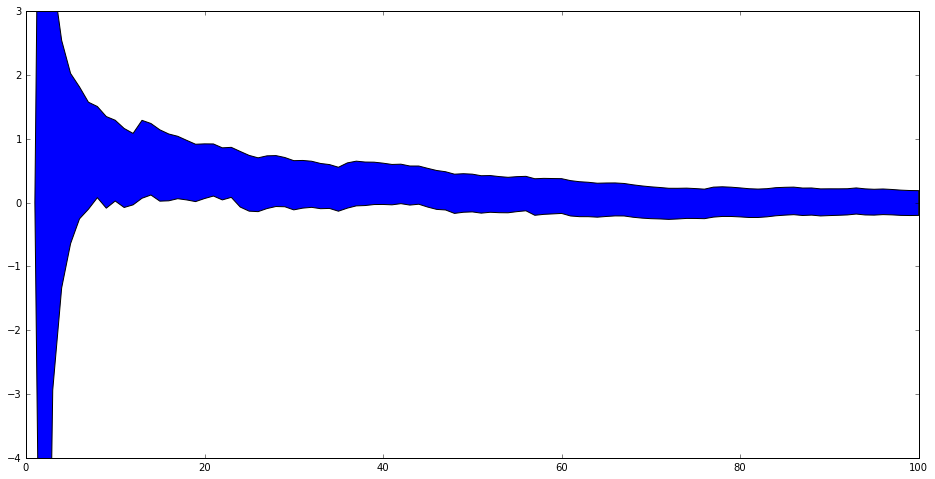

In [15]:
interval_plot_c(lower_bound,
                upper_bound,
                -4., 
                3.)

# d)

Найдем точный доверительный интервал для $\sigma^2$ при неизвестном $a$.

Для $N(a,\theta)$ точным доверительным интервалом уровня $\alpha$ будет:



$P(0 < \sigma^2 < \frac{n |X - \overline X|^2}{z_{1-\alpha}}) = \alpha$, 

$z$ - квантиль $\chi^2_{n-1}$

(возможно, правильный ответ -
$(\frac{(n-1)\tilde{s}}{z_{\frac{1+\alpha}{2}}}, \frac{(n-1)\tilde{s}}{z_{\frac{1-\alpha}{2}}})$, $z$ квантиль распределения $\chi^2_{n-1}$, $\tilde{s} = \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}}$ - стандартное отклонение)


In [42]:
z = lambda n: sts.chi2.ppf(1.-alpha, df=n-1)
lower_bound = lambda x, n: 0.
upper_bound = lambda x, n: (n-1.)*np.var(x)/z(n)

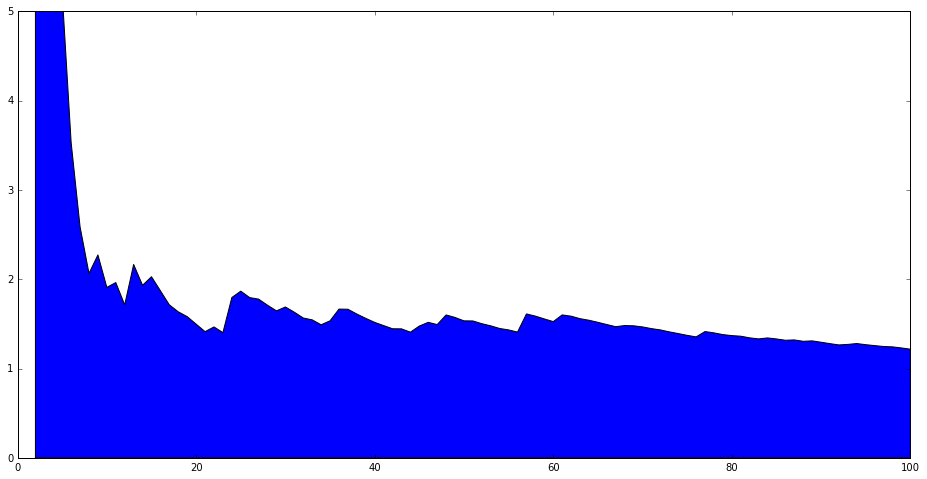

In [44]:
interval_plot(lower_bound,
              upper_bound,
              0., 
              5.)

# e)
Найдем точную доверительную область для $(a, \sigma^2)$.

$\frac{\sqrt{n}(\overline X - a)}{\sigma}$  распределен как $N(0, 1)$

$P(0 < \frac{(\overline{X} - a)^2}{\sigma^2} < \frac{z_1}{n}) = \sqrt{\alpha}$, где $z_1$ - квантиль уровня $\sqrt{\alpha}$ распределения $\chi^2_{1}$.

$\frac{ns^2}{\sigma^2}$ распределен как $\chi^2_{n-1}$

$P(0 < \sigma^2 < \frac{ns^2}{z_2}) = \sqrt{\alpha}$, где $z_2$ - квантиль уровня $1 - \sqrt{\alpha}$ распределения $\chi^2_{n-1}$

$\frac{n(\overline X - a)^2}{\sigma^2}$ независим с $\frac{ns^2}{\sigma^2}$

$P(0 < \sigma^2 < \frac{ns^2}{z_2} \land 0 < \frac{(\overline{X} - a)^2}{\sigma^2} < \frac{z_1}{n}) = \alpha$

$P(0 < \sigma^2 < \frac{ns^2}{z_2} \land \overline{X} - \sqrt{\frac{s^2z_1}{z_2}} < a < \overline{X} + \sqrt{\frac{s^2z_1}{z_2}}) = \alpha$



(0, 5)

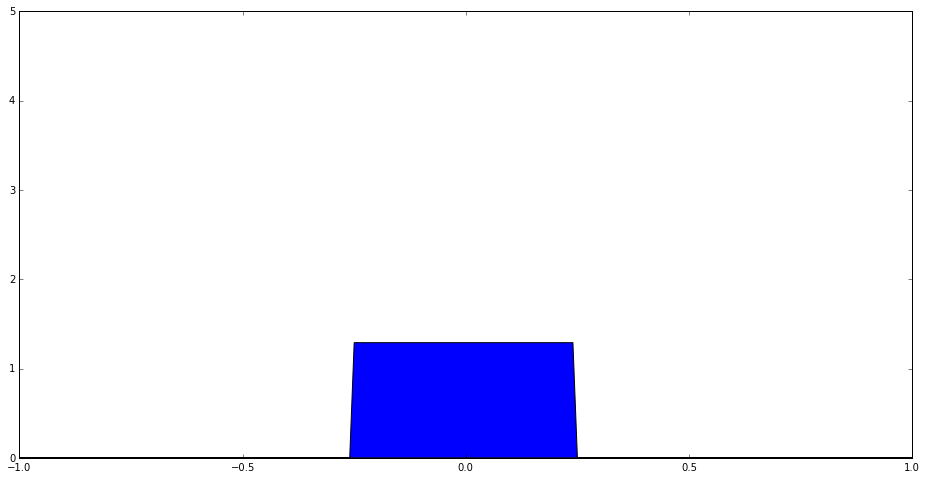

In [63]:

y1, y2, z1, z2 = [], [], sts.chi2.ppf(alpha**.5, df=1), sts.chi2.ppf(1.-alpha**.5, df=N-1)

x_min = np.mean(sample) - (np.var(sample) * z1 / z2) ** 0.5
x_max = np.mean(sample) + (np.var(sample) * z1 / z2) ** 0.5
y_min, y_max = 0, N*np.var(X)/z2

grid = np.arange(-10, 10, 0.01)

for x in grid:
    y1.append(y_min)
    if (x_min <= x <= x_max):
        y2.append(y_max)
    else:
        y2.append(y_min)
            
plt.figure(figsize=(16, 8))
plt.fill_between(grid, y1, y2)

plt.xlim(-1, 1)
plt.ylim(0, 5)

# Вывод:
При известном одном из параметров доверительный интервал для другого гораздо меньше (лучше/точнее), чем когда не известно ничего